In [3]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

print(iris_df.info())
print(iris_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  s

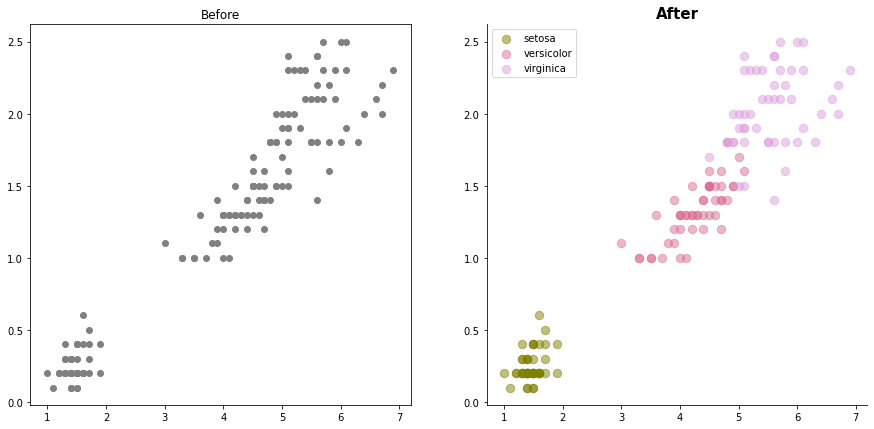

In [5]:
cmap = plt.get_cmap('Reds')
inner_colors = cmap([0.75, 0.5, 0.35, 0.25])

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].scatter(x='petal length (cm)', y='petal width (cm)',
              data=iris_df, color='gray')
ax[0].set_title('Before')

ax[1].scatter(x='petal length (cm)', y='petal width (cm)',
              data=iris_df[iris_df['species'] == 'setosa'],
              color='olive', alpha=0.5,
              label='setosa', s=70)
ax[1].scatter(x='petal length (cm)', y='petal width (cm)',
              data=iris_df[iris_df['species'] == 'versicolor'],
              color='palevioletred', alpha=0.5,
              label='versicolor', s=70)
ax[1].scatter(x='petal length (cm)', y='petal width (cm)',
              data=iris_df[iris_df['species'] == 'virginica'],
              color='plum', alpha=0.5,
              label='virginica', s=70)
ax[1].set_title('After', fontsize=15, fontweight='bold')
ax[1].legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

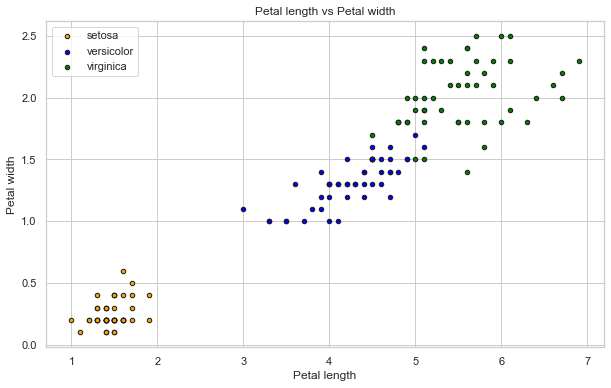

In [6]:
sns.set(style='whitegrid')
axes = iris_df[iris_df['species'] == 'setosa'].plot(kind='scatter',
                                                    x='petal length (cm)', y='petal width (cm)',
                                                    color='orange', label='setosa', edgecolor='k', figsize=(10, 6)
                                                    )
iris_df[iris_df['species'] == 'versicolor'].plot(kind='scatter',
                                                 x='petal length (cm)', y='petal width (cm)',
                                                 color='blue', label='versicolor', ax=axes, edgecolor='k')
iris_df[iris_df['species'] == 'virginica'].plot(kind='scatter',
                                                x='petal length (cm)', y='petal width (cm)',
                                                color='green', label='virginica', ax=axes, edgecolor='k')
axes.set_xlabel('Petal length')
axes.set_ylabel('Petal width')
axes.set_title('Petal length vs Petal width')
plt.show()

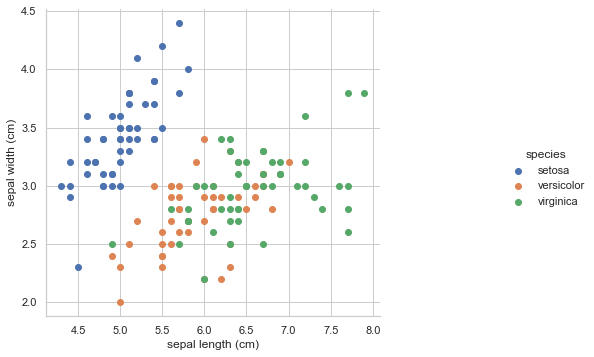

In [7]:
sns.FacetGrid(iris_df, hue='species').map(plt.scatter,
                                          'sepal length (cm)', 'sepal width (cm)').add_legend()
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

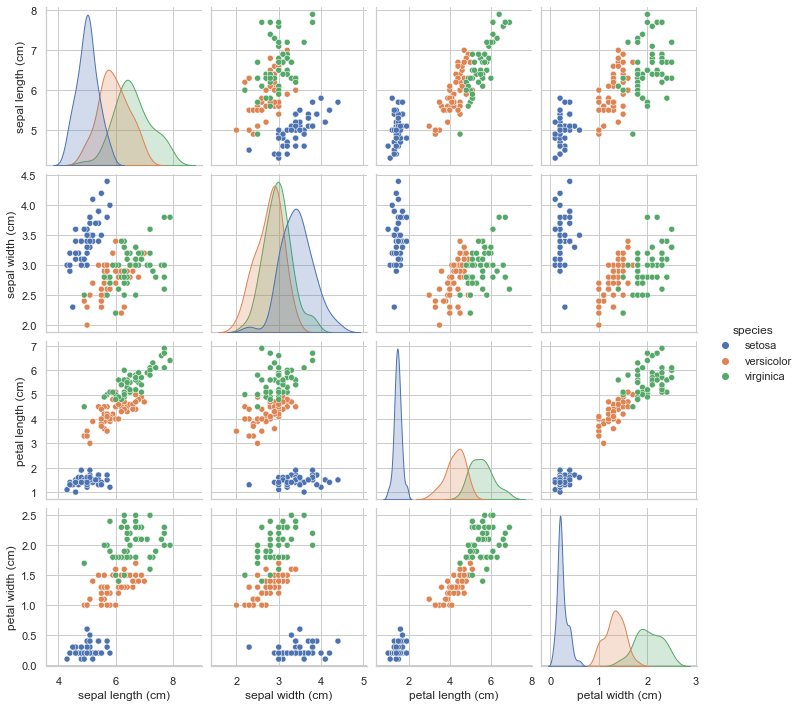

In [8]:
sns.pairplot(iris_df, hue='species')
plt.show()

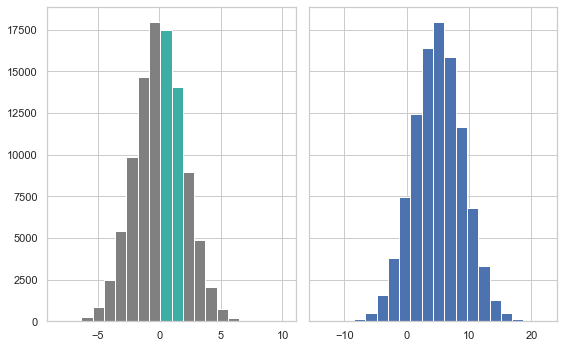

In [16]:
color_map = ['gray'] * 20
color_map[9] = color_map[10] = '#3caea3'

N_points = 100000
n_bins = 20

dist1 = np.random.normal(0, 2, N_points)
dist2 = np.random.normal(0, 10, N_points) * 0.4 + 5

fig, axes = plt.subplots(1, 2, sharey=True, tight_layout=True,
                         figsize=(8, 5))
N, bins, patches = axes[0].hist(dist1, bins=n_bins)
for i, patch in enumerate(patches):
    patch.set_facecolor(color_map[i])
axes[1].hist(dist2, bins=n_bins)

plt.show()

C:\anaconda3\envs\DL_exam_37\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


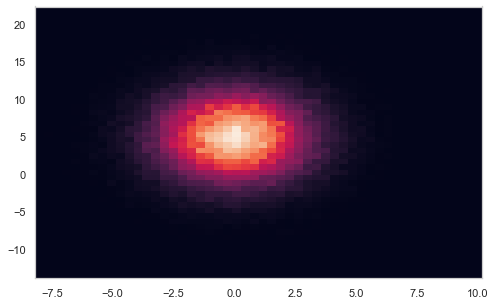

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
hist = ax.hist2d(dist1, dist2, bins=50)  # bins=숫자 로 픽셀 칸으로 빈도 조절?됨

plt.show()

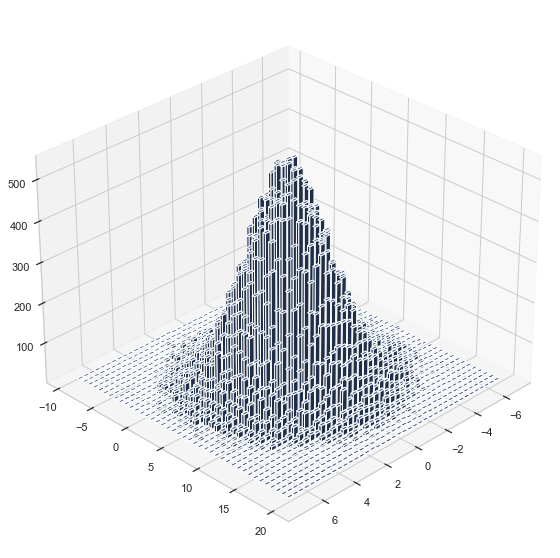

In [38]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(dist1, dist2, bins=40,
                                      range=[[-7, 7], [-10, 20]])  # 말 그대로 뭐 범위..

xpos, ypos = np.meshgrid(xedges[:-1]+0.25, yedges[:-1]+0.5,
                         indexing='ij')
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 10

dx = dy = 0.3 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.view_init(elev=30., azim=45)  # 보는 각도..
plt.show()

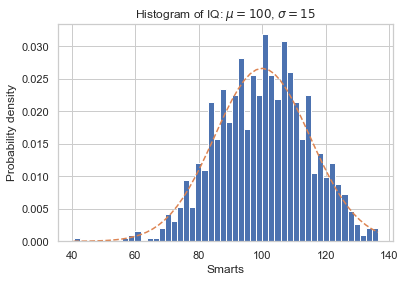

In [50]:
mu = 100
sigma = 15
x = np.random.normal(mu, sigma, 1000)  # 데이터가 많을 수록 정규분포도?에 가까워짐

num_bins = 50

fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of IQ: $\mu=100$, $\sigma=15$')
plt.show()

C:\anaconda3\envs\DL_exam_37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


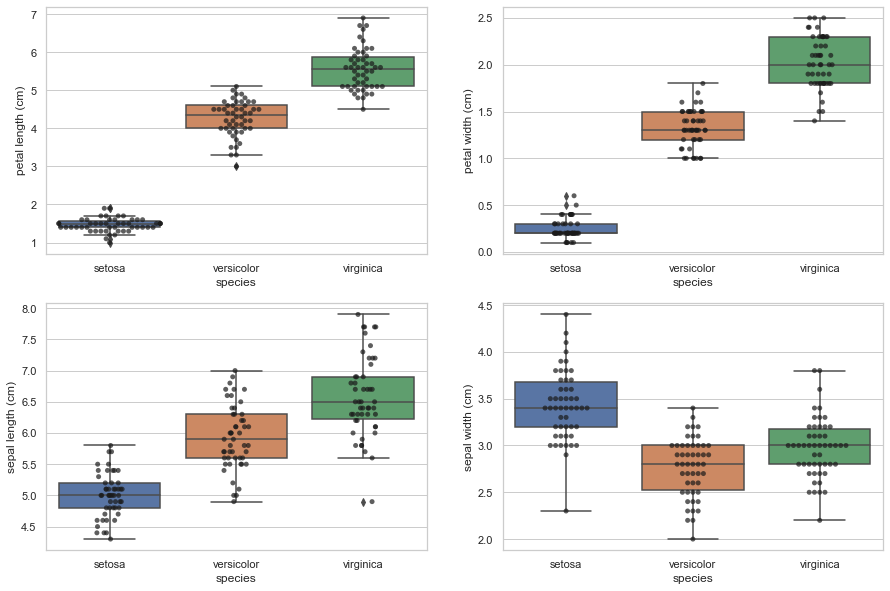

In [52]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='petal length (cm)', data=iris_df)
sns.swarmplot(x='species', y='petal length (cm)', data=iris_df,
              color='k', alpha=0.7)
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='petal width (cm)', data=iris_df)
sns.stripplot(x='species', y='petal width (cm)', data=iris_df,
              color='k', alpha=0.7)
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df)
sns.stripplot(x='species', y='sepal length (cm)', data=iris_df,
              color='k', alpha=0.7)
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='sepal width (cm)', data=iris_df,
            whis=np.inf)
sns.swarmplot(x='species', y='sepal width (cm)', data=iris_df,
              color='k', alpha=0.7)
plt.show()

C:\anaconda3\envs\DL_exam_37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\envs\DL_exam_37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


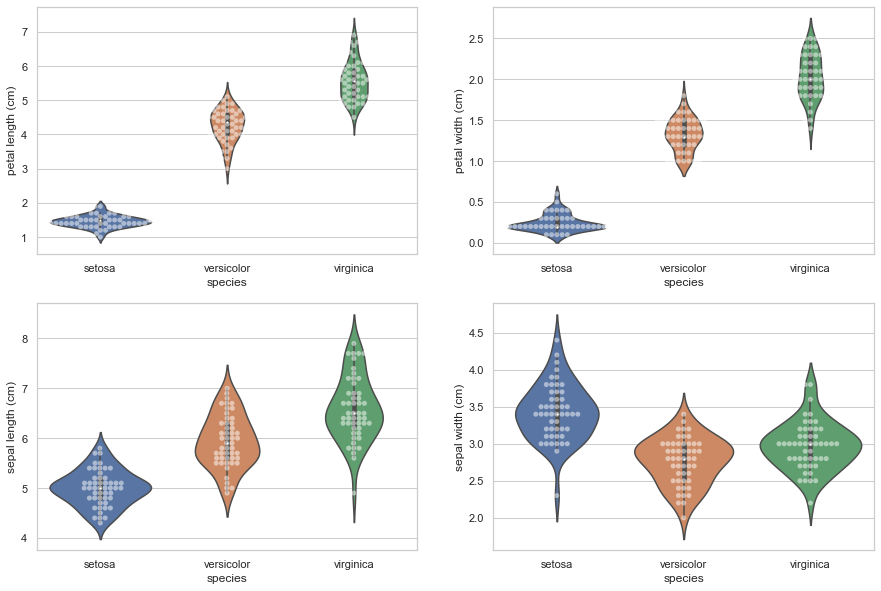

In [53]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='petal length (cm)', data=iris_df)
sns.swarmplot(x='species', y='petal length (cm)', data=iris_df,
              color='w', alpha=0.5)
plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='petal width (cm)', data=iris_df)
sns.swarmplot(x='species', y='petal width (cm)', data=iris_df,
              color='w', alpha=0.5)
plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='sepal length (cm)', data=iris_df)
sns.swarmplot(x='species', y='sepal length (cm)', data=iris_df,
              color='w', alpha=0.5)
plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='sepal width (cm)', data=iris_df,
               whis=np.inf)
sns.swarmplot(x='species', y='sepal width (cm)', data=iris_df,
              color='w', alpha=0.5)
plt.show()